In [3]:
import torch
print(torch.tensor([[1, 2], [3, 4]]))
print(torch.tensor([[1, 2], [3, 4]], device="mps:0")) # nvidia는 cuda, m1은 mps
print(torch.tensor([[1, 2], [3, 4]], dtype=torch.float64))

tensor([[1, 2],
        [3, 4]])
tensor([[1, 2],
        [3, 4]], device='mps:0')
tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64)


In [5]:
temp = torch.tensor([[1, 2], [3, 4]])
print(temp.numpy()) # gpu 상의 텐서에서 ndarray로 변환

temp = torch.tensor([[1, 2], [3, 4]], device="mps:0")
print(temp.to("cpu").numpy()) # cpu 상의 텐서로 변환 후 ndarray로 변환

[[1 2]
 [3 4]]
[[1 2]
 [3 4]]


In [6]:
temp = torch.FloatTensor([1, 2, 3, 4, 5, 6, 7])
print(temp[0], temp[1], temp[-1])
print('------------------------')
print(temp[2:5], temp[4:-1])

tensor(1.) tensor(2.) tensor(7.)
------------------------
tensor([3., 4., 5.]) tensor([5., 6.])


벡터 간 뺄셈 연산

In [7]:
v = torch.tensor([1, 2, 3])
w = torch.tensor([3, 4, 6])
print(w - v)

tensor([2, 2, 3])


텐서의 차원

In [9]:
temp = torch.tensor([
    [1, 2], [3, 4]])

print(temp.shape)
print('--------------------------')
print(temp.view(4, 1)) # 2x2를 4x1의 행렬로 변환
print('--------------------------')
print(temp.view(-1)) # 1차원 벡터로 변형
print('--------------------------')
print(temp.view(1, -1)) # -1은 (1, ?)과 같은 의미, 즉 앞에 주어진 1에 맞는 차원으로 자동 변환
print('--------------------------')
print(temp.view(-1, 1)) # 마찬가지

torch.Size([2, 2])
--------------------------
tensor([[1],
        [2],
        [3],
        [4]])
--------------------------
tensor([1, 2, 3, 4])
--------------------------
tensor([[1, 2, 3, 4]])
--------------------------
tensor([[1],
        [2],
        [3],
        [4]])


In [10]:
import pandas as pd
import torch
data = pd.read_csv('../class2.csv')

x = torch.from_numpy(data['x'].values).unsqueeze(dim=1).float()
y = torch.from_numpy(data['x'].values).unsqueeze(dim=1).float()

FileNotFoundError: [Errno 2] No such file or directory: '../class2.csv'

In [12]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self): # 필요한 변수를 선언하고, 데이터셋의 전처리를 해 줌
        self.label = pd.read_csv(csv_file)
    def __len__(self): # 데이터셋의 길이, 즉, 총 샘플의 수를 가져오는 함수
        return len(self.label)
    def __getitem__(self, index): # 데이터셋에서 특정 데이터를 가져오는 함수
        #(index번째 데이터를 반환하는 함수, 이때 반환되는 값은 텐서의 형태를 취함)
        sample = torch.tensor(self.label.iloc[idx, 0:3]).int()
        label = torch.tensor(self.label.iloc[idx, 3]).int()
        return sample, label
    
tensor_dataset = CustomDataset('../covtype.csv')
dataset = DataLoader(tensor_dataset, batch_size=4, shuffle=True)

TypeError: __init__() takes 1 positional argument but 2 were given

In [13]:
import torchvision.transforms as transforms

mnist_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (1.0,))
])

from torchvision.datasets import MNIST
import requests
download_root = '../chap02/data/MNIST_DATASET'

train_dataset = MNIST(download_root, transform=mnist_transform, train=True,
                     download=True)
valid_dataset = MNIST(download_root, transform=mnist_transform, train=False,
                     download=True)
test_dataset = MNIST(download_root, transform=mnist_transform, train=False,
                     download=True)

/Users/dongwook/opt/anaconda3/envs/CAU_DSLAB/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: dlopen(/Users/dongwook/opt/anaconda3/envs/CAU_DSLAB/lib/python3.9/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN2at4_ops19empty_memory_format4callEN3c108ArrayRefIxEENS2_8optionalINS2_10ScalarTypeEEENS5_INS2_6LayoutEEENS5_INS2_6DeviceEEENS5_IbEENS5_INS2_12MemoryFormatEEE
  Referenced from: <CAE66874-17C2-35C9-9C4D-6BA9770AF17F> /Users/dongwook/opt/anaconda3/envs/CAU_DSLAB/lib/python3.9/site-packages/torchvision/image.so
  Expected in:     <43816F8F-B81C-3A93-8BD8-33AA33E93629> /Users/dongwook/opt/anaconda3/envs/CAU_DSLAB/lib/python3.9/site-packages/torch/lib/libtorch_cpu.dylib
  warn(f"Failed to load image Python extension: {e}")


100.0%


Extracting ../chap02/data/MNIST_DATASET/MNIST/raw/train-images-idx3-ubyte.gz to ../chap02/data/MNIST_DATASET/MNIST/raw



100.0%


Extracting ../chap02/data/MNIST_DATASET/MNIST/raw/train-labels-idx1-ubyte.gz to ../chap02/data/MNIST_DATASET/MNIST/raw



19.9%

100.0%


Extracting ../chap02/data/MNIST_DATASET/MNIST/raw/t10k-images-idx3-ubyte.gz to ../chap02/data/MNIST_DATASET/MNIST/raw



100.0%

Extracting ../chap02/data/MNIST_DATASET/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../chap02/data/MNIST_DATASET/MNIST/raw



### Pytorch에서 모델을 정의하기 위해 module을 상속한 클래스를 사용하자
(model과 module의 차이점은?)

- 계층(layer): 모듈 또는 모듈을 구성하는 한 개의 계층으로 합성곱층(convolutional layer), 선형계층(linear layer) 등이 있음
- 모듈(module): 한 개 이상의 계층이 모여서 구성된 것으로, 모듈이 모여 새로운 모듈을 만들 수도 있음
- 모델(model): 최종적으로 원하는 네트워크로, 한 개의 모듈이 모델이 될 수도 있음

### 단순 신경망을 정의하는 방법
nn.Module을 상속받지 않는 매우 단순한 모델을 만들 때 사용함 -> 구현이 쉽고 단순하다는 장점이 있음
### nn.Module()을 상속하여 정의하는 방법
nn.Module을 상속받는 모델은 기본적으로 __init__()와 forward()를 포함함
- __init__() -> 상속자의 역할
- forward() -> 모델에서 실행되어야 하는 연산을 정의

### Sequential 신경망을 정의하는 방법



In [25]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

dataset = pd.read_csv('./chap02/data/car_evaluation.csv')
dataset.head()

,price,maint,doors,persons,lug_capacity,safety,output
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


<AxesSubplot: ylabel='output'>

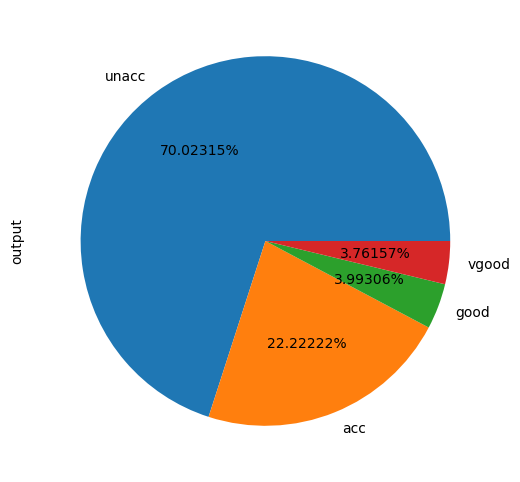

In [26]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size
dataset.output.value_counts().plot(kind='pie', autopct='%0.05f%%')

In [30]:
dataset.output.value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: output, dtype: int64

In [33]:
categorical_columns = ['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety']

for category in categorical_columns:
    dataset[category] = dataset[category].astype('category')

price = dataset['price'].cat.codes.values
# .cat.codes -> 범주형 데이터(단어)를 숫자(넘파이 배열)로 변환하기 위해 사용
# np.stack -> 두 개 이상의 numpy 객체를 합칠 때 사용
# 특이점은 해당 객체를 바탕으로 새로운 차원을 정의
# 즉, 2x2 numpy 객체였다면 이들 5개를 stack 연산하면, 5x2x2의 새로운 객체 탄생
# p.74를 보면 제대로 알 수 있음

maint = dataset['maint'].cat.codes.values
doors = dataset['doors'].cat.codes.values
persons = dataset['persons'].cat.codes.values
lug_capacity = dataset['lug_capacity'].cat.codes.values
safety = dataset['safety'].cat.codes.values

categorical_data = np.stack([price, maint, doors, persons, lug_capacity, safety], 1)
# axis 1로 한 이유는, 1차원 배열 안에 여러 개의 data가 들어가 있는데, 만약 0으로 합치면
# 각 row가 한 종류의 data만 contain
# axis 1로 해서 한 list에 각 배열의 값 하나 씩 저장함
categorical_data[:10]

array([[3, 3, 0, 0, 2, 1],
       [3, 3, 0, 0, 2, 2],
       [3, 3, 0, 0, 2, 0],
       [3, 3, 0, 0, 1, 1],
       [3, 3, 0, 0, 1, 2],
       [3, 3, 0, 0, 1, 0],
       [3, 3, 0, 0, 0, 1],
       [3, 3, 0, 0, 0, 2],
       [3, 3, 0, 0, 0, 0],
       [3, 3, 0, 1, 2, 1]], dtype=int8)

In [34]:
categorical_data = torch.tensor(categorical_data, dtype=torch.int64)
# torch의 tensor로 변환 완료
categorical_data[:10]

tensor([[3, 3, 0, 0, 2, 1],
        [3, 3, 0, 0, 2, 2],
        [3, 3, 0, 0, 2, 0],
        [3, 3, 0, 0, 1, 1],
        [3, 3, 0, 0, 1, 2],
        [3, 3, 0, 0, 1, 0],
        [3, 3, 0, 0, 0, 1],
        [3, 3, 0, 0, 0, 2],
        [3, 3, 0, 0, 0, 0],
        [3, 3, 0, 1, 2, 1]])

In [36]:
outputs = pd.get_dummies(dataset.output)
# dummy variable로 만들어 주는 함수
# 즉, 문자를 숫자 0,1 로 바꿔준다는 뜻
# ex. gender -> male, female 
# 이를 gender_male, gender_female 두 column으로 분리해 각각에 속하면 1, 안 속하면 0으로 encoding
outputs = outputs.values 
outputs = torch.tensor(outputs).flatten()
# 차원을 바꿀 때 사용함
# flatten()은 1차원으로 바꿔줌
print(categorical_data.shape)
print(outputs.shape)

torch.Size([1728, 6])
torch.Size([6912])


In [37]:
categorical_column_sizes = [len(dataset[column].cat.categories) for column in
                            categorical_columns]
categorical_embedding_sizes = [(col_size, min(50, (col_size+1)//2)) for col_size in
                              categorical_column_sizes]
print(categorical_embedding_sizes)

[(4, 2), (4, 2), (4, 2), (3, 2), (3, 2), (3, 2)]


In [39]:
total_records = 1728
test_records = int(total_records * .2)

categorical_train_data = categorical_data[:total_records - test_records]
categorical_test_data = categorical_data[total_records - test_records:total_records]
train_outputs = outputs[:total_records - test_records]
test_outputs = outputs[total_records - test_records:total_records]

print(len(categorical_train_data))
print(len(train_outputs))
print(len(categorical_test_data))
print(len(test_outputs))

1383
1383
345
345


In [41]:
class Model(nn.Module):
    def __init__(self, embedding_size, output_size, layers, p=0.4):
        super().__init__()
        self.all_embeddings = nn.ModuleList([nn.Embedding(ni, nf) for ni,
                                            nf in embedding_size])
        self.embedding_dropout = nn.Dropout(p)
        
        all_layers = []
        num_categorical_cols = sum((nf for ni, nf in embedding_size))
        input_size = num_categorical_cols
        
        for i in layers:
            all_layers.append(nn.Linear(input_size, i))
            all_layers.append(nn.ReLU(inplace=True))
            all_layers.append(nn.BatchNorm1d(i))
            all_layers.append(nn.Dropout(p))
            input_size = i
            
        all_layers.append(nn.Linear(layers[-1], output_size))
        self.layers = nn.Sequential(*all_layers)
    
    def forward(self, x_categorical):
        embeddings = []
        for i, e in enumerate(self.all_embeddings):
            embeddings.append(e(x_categorical[:,i]))
        
        x = torch.cat(embeddings, 1)
        x = self.embedding_dropout(x)
        x = self.layers(x)
        return x


In [42]:
model = Model(categorical_embedding_sizes, 4, [200, 100, 50], p=0.4)
print(model)

Model(
  (all_embeddings): ModuleList(
    (0): Embedding(4, 2)
    (1): Embedding(4, 2)
    (2): Embedding(4, 2)
    (3): Embedding(3, 2)
    (4): Embedding(3, 2)
    (5): Embedding(3, 2)
  )
  (embedding_dropout): Dropout(p=0.4, inplace=False)
  (layers): Sequential(
    (0): Linear(in_features=12, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=50, bias=True)
    (9): ReLU(inplace=True)
    (10): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.4, inplace=False)
    (12): Linear(in_features=50, out_features=4, bias=True)
  )
)


In [43]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [47]:
if torch.backends.mps.is_available():
    device = torch.device('mps')
    print("mps")
else:
    device = torch.device('cpu')
    print("cpu")

mps


In [50]:
epochs = 500
aggregated_losses = []
train_outputs = train_outputs.to(device=device, dtype=torch.int64)

for i in range(epochs):
    i += 1
    y_pred = model(categorical_train_data).to(device)
    single_loss = loss_function(y_pred, train_outputs)
    aggregated_losses.append(single_loss)
    
    if i%25 == 1:
        print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')
        
    optimizer.zero_grad()
    single_loss.backward()
    optimizer.step()
    
print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')

epoch:   1 loss: 0.56384754
epoch:  26 loss: 0.57479507
epoch:  51 loss: 0.56628340
epoch:  76 loss: 0.56404394
epoch: 101 loss: 0.57462859
epoch: 126 loss: 0.56058949
epoch: 151 loss: 0.55453581
epoch: 176 loss: 0.55862546
epoch: 201 loss: 0.55538452
epoch: 226 loss: 0.55078387
epoch: 251 loss: 0.55355990
epoch: 276 loss: 0.54975367
epoch: 301 loss: 0.55057931
epoch: 326 loss: 0.54320180
epoch: 351 loss: 0.54261780
epoch: 376 loss: 0.54203874
epoch: 401 loss: 0.54130757
epoch: 426 loss: 0.54644197
epoch: 451 loss: 0.53467757
epoch: 476 loss: 0.54230446
epoch: 500 loss: 0.5353671908


In [52]:
print(dataset['price'])
print(price)

0       vhigh
1       vhigh
2       vhigh
3       vhigh
4       vhigh
        ...  
1723      low
1724      low
1725      low
1726      low
1727      low
Name: price, Length: 1728, dtype: category
Categories (4, object): ['high', 'low', 'med', 'vhigh']
[3 3 3 ... 1 1 1]


In [53]:
print(dataset['maint'])
print(maint)

0       vhigh
1       vhigh
2       vhigh
3       vhigh
4       vhigh
        ...  
1723      low
1724      low
1725      low
1726      low
1727      low
Name: maint, Length: 1728, dtype: category
Categories (4, object): ['high', 'low', 'med', 'vhigh']
[3 3 3 ... 1 1 1]


In [56]:
print(categorical_columns)
print(categorical_column_sizes)
print(categorical_embedding_sizes)

['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety']
[4, 4, 4, 3, 3, 3]
[(4, 2), (4, 2), (4, 2), (3, 2), (3, 2), (3, 2)]


In [59]:
print(dataset['price'])

0       vhigh
1       vhigh
2       vhigh
3       vhigh
4       vhigh
        ...  
1723      low
1724      low
1725      low
1726      low
1727      low
Name: price, Length: 1728, dtype: category
Categories (4, object): ['high', 'low', 'med', 'vhigh']
